### Multi-stride gait analysis using treadmill extracted gait features
Drawing the ground reaction force as a function of % of gait cycle and marking forces at gait events

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_data_file = 'C:\\Users\\Rachneet Kaur\\Box\\GAIT\\sample_data\\data_export\\205_B3_TRIAL01_RAWDATA.csv'
gaitcycle_data_file = 'C:\\Users\\Rachneet Kaur\\Box\\GAIT\\sample_data\\data_export\\205_B3_TRIAL01_GAITCYCLES.csv'

#205, x = 15

In [3]:
raw_data = pd.read_csv(raw_data_file)
gaitcycle_data = pd.read_csv(gaitcycle_data_file)

In [4]:
raw_data

,Time,Speed,TreadMill_FZ,COPX,COPY
0,0.000,0.093474,553.232926,0.410341,0.517618
1,0.002,0.093474,554.197000,0.409869,0.520237
2,0.004,0.093474,553.099541,0.410471,0.519378
3,0.006,0.093474,554.193299,0.409392,0.522668
4,0.008,0.093474,553.510248,0.409996,0.520606
...,...,...,...,...,...
37521,75.042,0.028294,524.197905,0.448272,0.624241
37522,75.044,0.028294,527.175040,0.447323,0.629591
37523,75.046,0.028294,529.436221,0.447988,0.635472
37524,75.048,0.028294,530.592521,0.448724,0.634347


In [5]:
HSR_times = gaitcycle_data['Time'][gaitcycle_data['EventType']=='HSR']

In [41]:
def plot(line_color, event_color):
    style = dict(size=25, color='black')

    for x in range(15, 16):
    #     print (x)
        raw_data_stride = raw_data[(raw_data['Time']>=HSR_times[x:x+1].values[0]) & (raw_data['Time']<=HSR_times[x+1:x+2].values[0])]
        gaitcycle_data_stride = gaitcycle_data[(gaitcycle_data['Time']>=gaitcycle_data['Time'][gaitcycle_data['EventType']=='HSR'][x:x+1].values[0]) & (gaitcycle_data['Time']<=gaitcycle_data['Time'][gaitcycle_data['EventType']=='HSR'][x+1:x+2].values[0])]
        gaitcycle_data_stride['raw_data_time'] = 0
        gaitcycle_data_stride['force_z'] = 0
        gaitcycle_data_stride.reset_index(drop = True, inplace = True)

        for y in range(0, 6):
            raw_data_matching_index = (abs(raw_data_stride['Time']-gaitcycle_data_stride['Time'][y:y+1].values[0])).argmin()
            gaitcycle_data_stride['raw_data_time'].iloc[y] = raw_data_stride['Time'].iloc[raw_data_matching_index]
            gaitcycle_data_stride['force_z'].iloc[y] = raw_data_stride['TreadMill_FZ'].iloc[raw_data_matching_index]

        fig, ax = plt.subplots(figsize = (8, 5.2))
        plt.locator_params(axis='y', nbins=5)
        percentage_labels = 100*(raw_data_stride['Time'] -raw_data_stride['Time'].iloc[0])/(raw_data_stride['Time'].iloc[-1]-raw_data_stride['Time'].iloc[0])
        percentage_label_scatter_plot = 100*(gaitcycle_data_stride['raw_data_time'][:-1] -raw_data_stride['Time'].iloc[0])/(raw_data_stride['Time'].iloc[-1]-raw_data_stride['Time'].iloc[0])
        plt.plot(percentage_labels, raw_data_stride['TreadMill_FZ'], line_color, linewidth = 6, linestyle = '-', alpha = 0.8)#.rolling(20).mean())
        plt.scatter(percentage_label_scatter_plot, gaitcycle_data_stride['force_z'][:-1], color = event_color, marker = '*', s = 800, label = 'Gait event', edgecolors = 'brown', linewidths = 2.5, zorder = 5)
        plt.annotate("HSR", # this is the text
                     (percentage_label_scatter_plot[0], gaitcycle_data_stride['force_z'][0]), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(15,-5), # distance from text to points (x,y)
    #                  ha='center',
                     **style,
                    ) # horizontal alignment can be left, right or center
        plt.annotate("TOL", # this is the text
                     (percentage_label_scatter_plot[1], gaitcycle_data_stride['force_z'][1]), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(15,-5), # distance from text to points (x,y)
    #                  ha='center',
                     **style,
                    ) # horizontal alignment can be left, right or center
        plt.annotate("MidSSR", # this is the text
                     (percentage_label_scatter_plot[2], gaitcycle_data_stride['force_z'][2]), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(15,-5), # distance from text to points (x,y)
    #                  ha='center',
                     **style,
                    ) # horizontal alignment can be left, right or center

        plt.annotate("HSL", # this is the text
                     (percentage_label_scatter_plot[3], gaitcycle_data_stride['force_z'][3]), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(15,-5), # distance from text to points (x,y)
    #                  ha='center',
                     **style,
                    ) # horizontal alignment can be left, right or center
        plt.annotate("TOR", # this is the text
                     (percentage_label_scatter_plot[4], gaitcycle_data_stride['force_z'][4]), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(15,-5), # distance from text to points (x,y)
    #                  ha='center',
                     **style,
                    ) # horizontal alignment can be left, right or center
        plt.annotate("MidSSL", # this is the text
                     (percentage_label_scatter_plot[5], gaitcycle_data_stride['force_z'][5]), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(15,-5), # distance from text to points (x,y)
    #                  ha='center',
                     **style,
                    ) # horizontal alignment can be left, right or center
    #     plt.text(gaitcycle_data_stride['raw_data_time'][0], gaitcycle_data_stride['force_z'][0], "HSR", **style)
    #     plt.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
        plt.ylabel('Ground reaction force (in N)', fontsize = 21)
        plt.xlabel('Percentage of gait cycle', fontsize = 21)
        plt.legend(fontsize = 21, loc = 'lower left')
        plt.setp(ax.get_xticklabels(), Fontsize=17) 
        plt.setp(ax.get_yticklabels(), Fontsize=17) 
        # Hide the right and top spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.savefig('kinetic_force_features.png', dpi = 350)
        plt.show()

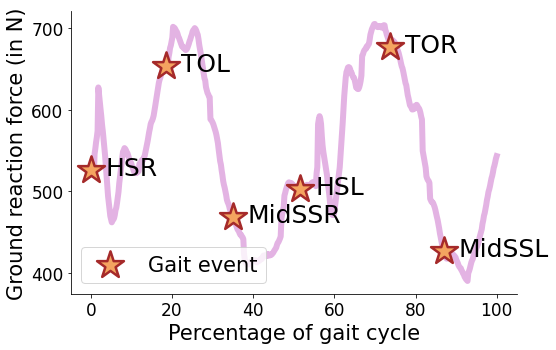

In [42]:
plot('plum', 'sandybrown') #sandybrown